## Final Project Submission

Please fill out:
* Student name: Eduardo Calzadilla
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Movie genre and title recommendations

#### Datasets: 
    1. IMDB
    2. Rotten Tomatoes
    3. TheMovieDB.org
    4. Box Office Mojo





## Contents

**A. [Exploratory Data Analysis](#EDA)** <br>
  1. [Initial exploration and cleanup](#Iec)<br>
  2. [Exploratory visualizations](#Ev)<br>
  3. [Transformations and joins](#Tj)<br>
  
**B. [ROI, ratings and production budget](#Rrpb)**<br>
 

## Introduction & Summary

Throughout this notebook we will be exploring three datasets as highlighted above, in order to spot trend that could be indicative of higher succes capacity and return on investment (ROI). 

We will be focusing on the following four null hypotheses:
  1. Movies with higher ratings do not perform significantly better in terms of gross income and ROI.
  2. All genres perform equally in terms of ratings, gross income and ROI.
  3. There are no words that are indicative of higher performance in terms of ratings and ROI. -- change to runtime 
  4. There has been no change in terms of competition (number of movies coming out) 4 year prior to 2015 and 4 year after 2015. 

We have found that there are significant similarities between median ratings and median performance. etc...

In [166]:
# Importing necessary packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import glob
import zipfile
%matplotlib inline

In [167]:
# Passing zip doc filenames to a list for storing DataFrames. 
zippedData = glob.glob("zippedData/*.gz")

In [4]:
# Verifyig that all the docs in zippedData were read correctly
zippedData

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [5]:
# Ceate list of variables for storing DataFrames.
df_name=[]
for filename in zippedData:
    df_name.append("df_" + filename.split("/",1)[1].split(".",3)[0] 
                + "_" + filename.split("/",1)[1].split(".",3)[1] 
                + "_" + filename.split("/",1)[1].split(".",3)[2])

In [6]:
df_dic={}
i = 0
for filename in zippedData:
    if "csv" in filename:
        df_dic[df_name[i]] = pd.read_csv(filename,
                             compression='gzip')
    else: 
        df_dic[df_name[i]] = pd.read_csv(filename
                                   , sep='\t'
                                   , encoding = 'unicode_escape')
    i+=1
    

In [331]:
df_imdb_title_crew = df_dic["df_imdb_title_crew"]
df_imdb_title_akas = df_dic["df_imdb_title_akas"]
df_imdb_title_ratings = df_dic["df_imdb_title_ratings"]
df_imdb_name_basics = df_dic["df_imdb_name_basics"]
df_imdb_title_basics = df_dic["df_imdb_title_basics"]
df_imdb_title_principals = df_dic["df_imdb_title_principals"]

df_rt_movie_info_tsv = df_dic["df_rt_movie_info_tsv"]
df_rt_reviews_tsv = df_dic["df_rt_reviews_tsv"]

df_tmdb_movies_csv = df_dic["df_tmdb_movies_csv"]

df_tn_movie_budgets_csv = df_dic["df_tn_movie_budgets_csv"]

df_bom_movie_gross_csv = df_dic["df_bom_movie_gross_csv"]


<a id="EDA"></a>

## EXPLORATORY DATA ANALYSIS

Now that the datastes are loaded into DataFrames, we will explore the datasets to understand the data present in each. Later we will drill into the data to understand possible null values and start cleaning the same for joining and use. 

As we see the data for the first time, we will make note of potential areas for cleanup.

In [287]:
df_imdb_title_crew.head(2)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"


As we see above the all columns seem to contain secondary keys, or it could also contain useless data. We will verify as we see other IMBD datasets, and considering possible joins.

In [288]:
df_imdb_title_akas.head(2)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0


Above we see that this df contains movie titles, and lists (in binary) if the title is the original, as well as the region and language it was released in. We will find more about attribute values later on. For now we are assuming original titles are pre-release or location specific. 

We can also see that the "title id" column has a similar format to the "tconst" column in the previous df.

In [289]:
df_imdb_title_ratings.head(2)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


It now seems that the "tconst" column in the first df joins with this df rather than the "df_imdb_title_akas" df. And this df provides the ratings as well as number of votes for each score. 

In [290]:
df_imdb_name_basics.head(2)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"


In this df we see data associated with crew members and their associated movies. Given the nature of our study, we will probably ignore this table altogether, unless it proves necessary for joining tables. 

In [291]:
df_imdb_title_basics.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


Here we see the genre data and that it can be joined to the "df_imdb_title_ratings" df. 

In [292]:
df_imdb_title_principals.head(2)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN


This df contains a joining column for all other columns, except the "df_imdb_title_akas" df. It provides parsed information on the roles of the cast and crew related dataframe. 

In [293]:
df_rt_reviews_tsv.head(2)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


It seems the above dataframe contains review information, and names and publishing means of the critic (also read "movie-viewer") who posted the same. It could be joined to specific movie using the id column. 

We will verify if this is the case with the following df. 

In [294]:
df_rt_movie_info_tsv.head(2)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


Our original assumption seems correct in that the RottenTomatoes DataFrames can be joined using the "id" column in the previous table. However, we do not have the name of the film which might be useful for our word count analysis - however, it might not be necessary if we already have enough data samples from IMDB, for example.  

Additionally this dataframe contains "writer", "director", "dvd_date", and "studio" columns which will not be useful for our analysis, but the "director" and "writer" columns could be used for joining to movie titles. We will also need to further investigate the "rating" columns as it seems that the column in this table is specifying the Motion Picture Association (MPA) rating system, rather than point ratings associated with a review.

In [295]:
df_tmdb_movies_csv.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In the above we see that the "Unnamed:0" column can probably be deleted as it seems to contain an index rather than the primary key, as there is another column named "id". 

We can also probably delete one of the title columns. We will be keeping the "title" column, rather than the "original title" column, as we are making the assumption that the latter contains titles used while working on the movie (or prerelease titles).

In [296]:
df_tn_movie_budgets_csv.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [297]:
df_bom_movie_gross_csv.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In the above we can see both dataframes contain financial data.

We don't need both dataframes and will choose the former as it contains the full release date and the production budget. Both will be useful for our analysis, and the exact release date can allow us more granularity on when to release Microsoft's first film.  

<a id="Iec"></a>
## Initial exploration and cleanup

Let's take a quick recap on what we've learned from each dataset so far.

1. df_imdb_title_crew: is a joining table, it joins between df_imdb_title_ratings and df_imdb_title_basics, which we can use to title ratings, gender, gross income and ROI (useful for testing our first and second hypotheses) by joining on movie titles with the df_tn_movie_budgets_csv <br><br>

2. df_tn_movie_budgets_csv: contains financial information as well as the name of the movies, which we will use to join on IMDB tables. <br><br>

3. df_tmdb_movies_csv: can join using the original title fields (assuming tmdb is a misnomer for imdb) on df_imdb_title_basics, which can inform our first and third hypotheses (as it could tell us which title is in english for our vectorizer). <br><br>

4. df_rt_movie_info_tsv: can join with df_rt_reviews_tsv using the id columns, and we can then compare ratings, genre and release date, as well as gross domestic income for hypotheses 1,2 and 4.  <br><br>

Now we will start examining and cleaning the data. Let's make note that for our analytical purposes df_imdb_title_principals and df_imdb_name_basics won't be useful, so we will br ignoring these tables altogether.

During the cleanup process we will be looking at potential missing data that could be expressed as other than null. Unique values that could be indicative of missing data, include the following:
- Impossible values
- Null categories
- 0's where not logical


In [298]:
df_imdb_title_ratings.info() 
# Since there are no noticeable nulls, and we can 
# safely assume all columns are foreign keys given our 
# initial lookthrough, we will continue with the next df. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [299]:
df_imdb_title_ratings.describe(include=np.object)
# Given our initial lookthrough, and that 
# the "tconst" column contains all unique values
# we can safely assume they are primery and a foreign key.

,tconst
count,73856
unique,73856
top,tt7119492
freq,1


In [300]:
df_imdb_title_ratings.describe() 
# Here we can note that the averages for ratings
# don't vary significantly. 

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


In [301]:
for column in df_imdb_title_ratings.columns:
    print(df_imdb_title_ratings[column].value_counts())
# None of the following seems to be possible 
# null values so let's move on.

tt7119492    1
tt4264562    1
tt2948472    1
tt2421026    1
tt6508018    1
            ..
tt2294473    1
tt3407422    1
tt2391070    1
tt3488056    1
tt1906470    1
Name: tconst, Length: 73856, dtype: int64
7.0     2262
6.6     2251
7.2     2249
6.8     2239
6.5     2221
        ... 
9.6       18
10.0      16
9.8       15
9.7       12
9.9        5
Name: averagerating, Length: 91, dtype: int64
6        2875
5        2699
7        2476
8        2167
9        1929
         ... 
18286       1
16289       1
1958        1
4007        1
4098        1
Name: numvotes, Length: 7349, dtype: int64


In [302]:
for column in df_imdb_title_basics.columns:
    print(df_imdb_title_basics[column].value_counts())
    
print(df_imdb_title_basics.info())
df_imdb_title_basics.describe() 

# Again we see no indication of othery types of null values
# and we see little effect on the "genre" and "runtime_min"
# columns

tt5029212    1
tt2072249    1
tt2504022    1
tt1872203    1
tt4913034    1
            ..
tt7622208    1
tt2600444    1
tt1617205    1
tt1995304    1
tt7422248    1
Name: tconst, Length: 146144, dtype: int64
Home                         24
Broken                       20
The Return                   20
Alone                        16
Homecoming                   16
                             ..
La vallée des loups           1
Cort(Os)Azar                  1
Método Livingston             1
The Celebrated Gisaeng        1
Le siècle de Le Corbusier     1
Name: primary_title, Length: 136071, dtype: int64
Broken                       19
Home                         18
The Return                   17
Homecoming                   13
Freedom                      13
                             ..
Belly of the Tantra           1
Retake                        1
Bokashi                       1
Una flama al cor              1
Le siècle de Le Corbusier     1
Name: original_title, Length: 137773, 

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [303]:
# Let's continue by removing columns we won't 
# need for our analysis
df_imdb_title_genre = df_imdb_title_basics.copy()

# Also, since we will need genre, let's remove 
# columns with nulls in the genre column 
# since these would constitute only  the 3% of the data.
df_imdb_title_genre.dropna(subset=["genres"],inplace=True)

print(df_imdb_title_genre.info())
df_imdb_title_genre.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
tconst             140736 non-null object
primary_title      140736 non-null object
original_title     140734 non-null object
start_year         140736 non-null int64
runtime_minutes    112233 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB
None


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [304]:
# Converting genre column into a list --- MIGHT HAVE TO JOIN BEFORE EXPANSION
df_imdb_title_genre["genres"] = df_imdb_title_genre["genres"].str.split(",")
df_imdb_title_genre_expanded = df_imdb_title_genre.copy()

# Expand list into rows
rows = []
_ = df_imdb_title_genre_expanded.apply(lambda row: [rows.append([row['tconst'], row['primary_title']
                                                        , row["original_title"], row["start_year"] 
                                                        , row["runtime_minutes"], nn]) 
                         for nn in row.genres], axis=1)
df_imdb_title_genre_expanded = pd.DataFrame(rows, columns=df_imdb_title_genre_expanded.columns)


In [305]:
df_imdb_title_genre.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]"


In [306]:
df_imdb_title_genre_expanded.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime


In [237]:
for column in df_tn_movie_budgets_csv.columns:
    print(df_tn_movie_budgets_csv[column].value_counts())
    
df_tn_movie_budgets_csv.info()

# Again no noticeable null placeholder values and no nulls

4      58
53     58
61     58
65     58
69     58
       ..
85     57
100    57
96     57
92     57
97     57
Name: id, Length: 100, dtype: int64
Dec 31, 2014    24
Dec 31, 2015    23
Dec 31, 2010    15
Dec 31, 2008    14
Dec 31, 2009    13
                ..
Dec 31, 1990     1
Sep 30, 1983     1
Apr 20, 2018     1
Dec 20, 1995     1
May 31, 1996     1
Name: release_date, Length: 2418, dtype: int64
Home                                    3
Halloween                               3
King Kong                               3
Venom                                   2
The Love Letter                         2
                                       ..
Dear Wendy                              1
Freddyâs Dead: The Final Nightmare    1
Nurse Betty                             1
O (Othello)                             1
The Nutcracker                          1
Name: movie, Length: 5698, dtype: int64
$20,000,000    231
$10,000,000    212
$30,000,000    177
$15,000,000    173
$25,000,000    171
 

In [223]:
# Dropping id column which won't be useful for us
df_tn_movie_budgets = df_tn_movie_budgets_csv.drop("id", axis=1)

# Expanding release_date column
df_tn_movie_budgets['release_date'] = pd.to_datetime(df_tn_movie_budgets['release_date'])

df_tn_movie_budgets['day'] = df_tn_movie_budgets['release_date'].dt.day
df_tn_movie_budgets['month'] = df_tn_movie_budgets['release_date'].dt.month
df_tn_movie_budgets['year'] = df_tn_movie_budgets['release_date'].dt.year

df_tn_movie_budgets.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,day,month,year
0,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",18,12,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",20,5,2011


In [230]:
# Convert amounts in string currency to float
currency_columns = ["production_budget", "domestic_gross", "worldwide_gross"]

for column in currency_columns:
    df_tn_movie_budgets[[column]] = df_tn_movie_budgets[[column]].replace('[\$,]','',regex=True).astype(float)


In [234]:
# Double check changes
df_tn_movie_budgets.info()
df_tn_movie_budgets.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
day                  5782 non-null int64
month                5782 non-null int64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 361.5+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,day,month,year
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,18,12,2009
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,20,5,2011


In [233]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
day                  5782 non-null int64
month                5782 non-null int64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 361.5+ KB


In [241]:
for column in df_tmdb_movies_csv.columns:
    print(df_tmdb_movies_csv[column].value_counts())
    
df_tmdb_movies_csv.info()


2047     1
5448     1
3371     1
13612    1
15661    1
        ..
12979    1
2740     1
693      1
6838     1
0        1
Name: Unnamed: 0, Length: 26517, dtype: int64
[99]                             3700
[]                               2479
[18]                             2268
[35]                             1660
[27]                             1145
                                 ... 
[16, 35, 99]                        1
[10402, 16, 18]                     1
[12, 18, 14, 9648]                  1
[10402, 10751, 14, 10770, 35]       1
[99, 12, 36]                        1
Name: genre_ids, Length: 2477, dtype: int64
292086    3
463839    3
11976     3
391872    3
416572    3
         ..
356987    1
350846    1
479871    1
500353    1
524288    1
Name: id, Length: 25497, dtype: int64
en    23291
fr      507
es      455
ru      298
ja      265
      ...  
ha        1
hy        1
bo        1
si        1
af        1
Name: original_language, Length: 76, dtype: int64
Eden               

In [74]:
# First let's drop the columns we won't need, 
# and let's keep titles in english for ease of comparison
df_imdb_movies = df_tmdb_movies_csv.drop(["Unnamed: 0","genre_ids","popularity"], axis=1)

df_imdb_movies = df_imdb_movies.loc[df_imdb_movies.original_language =='en']

# Then let's expand on the release date into three columns, one for day, month and year 
# for ease of visualization
df_imdb_movies['release_date'] = pd.to_datetime(df_imdb_movies['release_date'])

df_imdb_movies['day'] = df_imdb_movies['release_date'].dt.day
df_imdb_movies['month'] = df_imdb_movies['release_date'].dt.month
df_imdb_movies['year'] = df_imdb_movies['release_date'].dt.year


df_imdb_movies.info()

df_imdb_movies.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23291 entries, 0 to 26516
Data columns (total 10 columns):
id                   23291 non-null int64
original_language    23291 non-null object
original_title       23291 non-null object
release_date         23291 non-null datetime64[ns]
title                23291 non-null object
vote_average         23291 non-null float64
vote_count           23291 non-null int64
day                  23291 non-null int64
month                23291 non-null int64
year                 23291 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 2.0+ MB


,id,original_language,original_title,release_date,title,vote_average,vote_count,day,month,year
0,12444,en,Harry Potter and the Deathly Hallows: Part 1,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,19,11,2010
1,10191,en,How to Train Your Dragon,2010-03-26,How to Train Your Dragon,7.7,7610,26,3,2010


In [76]:
for column in df_rt_movie_info_tsv.columns:
    print(df_rt_movie_info_tsv[column].value_counts())
    
df_rt_movie_info_tsv.info()


2000    1
697     1
673     1
674     1
675     1
       ..
1347    1
1349    1
1350    1
1351    1
1       1
Name: id, Length: 1560, dtype: int64
A group of air crash survivors are stranded in the Mongolian desert with no chance of rescue. Facing a brutal environment, dwindling resources, and an attack by desert smugglers, they realize their only hope is doing the "impossible"--building a new plane from the wreckage.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [333]:
# Here we can drop synopsis, rating, dvd_date among others
df_rt_movie_info = df_rt_movie_info_tsv.drop(["synopsis","rating","director","writer","dvd_date","currency","studio"], axis=1)

# Again let's expand on the theatre date into three columns, one for day, month and year 
# for ease of visualization

df_rt_movie_info["theater_date"] = pd.to_datetime(df_rt_movie_info["theater_date"])

df_rt_movie_info['day'] = df_rt_movie_info['theater_date'].dt.day
df_rt_movie_info['month'] = df_rt_movie_info['theater_date'].dt.month
df_rt_movie_info['year'] = df_rt_movie_info['theater_date'].dt.year

# Since the nulls in the genre column constitute less then 1% of the total data
# we will drop these rows. It is also important to note that genre is a list, and we 
# will have to parse these out later.
df_rt_movie_info.dropna(subset=["genre"],inplace=True)

# Unfortunately, we cannot drop the nulls in the theatre_date and box_office columns, 
# we will instead keep them as is and make note of these. 

# Converting box_office to float
df_rt_movie_info["box_office"] = df_rt_movie_info["box_office"].str.replace(',', '').astype(float)


df_rt_movie_info.info()

df_rt_movie_info.head(2)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1552 entries, 0 to 1559
Data columns (total 8 columns):
id              1552 non-null int64
genre           1552 non-null object
theater_date    1201 non-null datetime64[ns]
box_office      340 non-null float64
runtime         1526 non-null object
day             1201 non-null float64
month           1201 non-null float64
year            1201 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 109.1+ KB


,id,genre,theater_date,box_office,runtime,day,month,year
0,1,Action and Adventure|Classics|Drama,1971-10-09,NaN,104 minutes,9.0,10.0,1971.0
1,3,Drama|Science Fiction and Fantasy,2012-08-17,600000.0,108 minutes,17.0,8.0,2012.0


In [334]:
# Converting genre column into a list 
df_rt_movie_info["genre"] = df_rt_movie_info["genre"].str.split("|")
df_rt_movie_info_expanded = df_rt_movie_info.copy()


# Expand list into rows
rows = []
_ = df_rt_movie_info_expanded.apply(lambda row: [rows.append([row['id'], nn
                                                        , row["theater_date"], row["box_office"] 
                                                        , row["runtime"], row["day"], row["month"], row["year"]]) 
                         for nn in row.genre], axis=1)
df_rt_movie_info_expanded = pd.DataFrame(rows, columns=df_rt_movie_info_expanded.columns)


In [335]:
df_rt_movie_info.head(2)

,id,genre,theater_date,box_office,runtime,day,month,year
0,1,"[Action and Adventure, Classics, Drama]",1971-10-09,NaN,104 minutes,9.0,10.0,1971.0
1,3,"[Drama, Science Fiction and Fantasy]",2012-08-17,600000.0,108 minutes,17.0,8.0,2012.0


In [336]:
df_rt_movie_info_expanded.head(2)

,id,genre,theater_date,box_office,runtime,day,month,year
0,1,Action and Adventure,1971-10-09,NaN,104 minutes,9.0,10.0,1971.0
1,1,Classics,1971-10-09,NaN,104 minutes,9.0,10.0,1971.0


In [160]:
for column in df_rt_reviews_tsv.columns:
    print(df_rt_reviews_tsv[column].value_counts())
    
df_rt_reviews_tsv.info()

782     338
1067    275
1525    262
1777    260
1083    260
       ... 
28        1
102       1
348       1
476       1
1727      1
Name: id, Length: 1135, dtype: int64
Parental Content Review                                                                                                                                                                                                                    24
full review at Movies for the Masses                                                                                                                                                                                                       15
full review in Greek                                                                                                                                                                                                                        9
click to read the full review                                                                                        

In [205]:
# Keeping only relevant columns
df_rt_reviews = df_rt_reviews_tsv[["id","rating","top_critic"]].copy()

# Dropping nans from rating, since it is our main interest, regardless that
# these rows constitute ~25% of the data in the df. 
df_rt_reviews.dropna(subset=["rating"], inplace=True)

# df_rt_reviews["rating"] = df_rt_reviews["rating"].astype(float)



# Standardizing rating scores
# df_rt_reviews["rating"] = pd.eval(df_rt_reviews["rating"].fillna(1000))


In [213]:
to_del = []
to_del_dedup = []
i = 0

# Try to change fraction into decimal if not, set as item to drop from column
for row in df_rt_reviews["rating"]:
    try:
        eval(row)
    except Exception:
        to_del.append(row)
    else:
        df_rt_reviews["rating"].iloc[i] = (eval(row))
        i+=1
        
# Dedup list of items to del from column
for value in to_del:
    if value not in to_del_dedup:
        to_del_dedup.append(value)


/Users/eduardo_calzadilla/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [215]:
df_rt_reviews = df_rt_reviews[~df_rt_reviews['rating'].isin(to_del_dedup)]

In [240]:
df_rt_reviews["rating"] = df_rt_reviews["rating"].astype(float) # Verify altered column

In [241]:
df_rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34446 entries, 0 to 54431
Data columns (total 3 columns):
id            34446 non-null int64
rating        34446 non-null float64
top_critic    34446 non-null int64
dtypes: float64(1), int64(2)
memory usage: 1.1 MB


While we are left with ~63% of the original dataset length, it is safer not to translate the letter grading into an approximately equivalent numerical grading. 

<a id="Tj"></a>
## Joins

In [247]:
df_imdb_title_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
tconst           73856 non-null object
averagerating    73856 non-null float64
numvotes         73856 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [310]:
df_imdb_title_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 6 columns):
tconst             140736 non-null object
primary_title      140736 non-null object
original_title     140734 non-null object
start_year         140736 non-null int64
runtime_minutes    112233 non-null float64
genres             140736 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 7.5+ MB


In [307]:
# rceating an expanded set for the genre analysis, but keeping a regular set for ROI analysis
df_imbd_title_and_ratings = df_imdb_title_ratings.join(df_imdb_title_genre.set_index('tconst'), on='tconst')

df_imbd_title_and_ratings_expanded = df_imdb_title_ratings.join(df_imdb_title_genre_expanded.set_index('tconst'), on='tconst')


In [308]:
df_imbd_title_and_ratings.head(2)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,[Romance]
1,tt10384606,8.9,559,Borderless,Borderless,2019.0,87.0,[Documentary]


In [311]:
df_imbd_title_and_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
tconst             73856 non-null object
averagerating      73856 non-null float64
numvotes           73856 non-null int64
primary_title      73052 non-null object
original_title     73052 non-null object
start_year         73052 non-null float64
runtime_minutes    65720 non-null float64
genres             73052 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 4.5+ MB


In [309]:
df_imbd_title_and_ratings_expanded.head(2)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019.0,87.0,Documentary


In [313]:
# Here we can see the effect of fanout, which is why this df will only be used for
# observing genre relationships
df_imbd_title_and_ratings_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129294 entries, 0 to 73855
Data columns (total 8 columns):
tconst             129294 non-null object
averagerating      129294 non-null float64
numvotes           129294 non-null int64
primary_title      128490 non-null object
original_title     128490 non-null object
start_year         128490 non-null float64
runtime_minutes    118437 non-null float64
genres             128490 non-null object
dtypes: float64(3), int64(1), object(4)
memory usage: 8.9+ MB


In [266]:
df_tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 8 columns):
release_date         5782 non-null datetime64[ns]
movie                5782 non-null object
production_budget    5782 non-null float64
domestic_gross       5782 non-null float64
worldwide_gross      5782 non-null float64
day                  5782 non-null int64
month                5782 non-null int64
year                 5782 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(3), object(1)
memory usage: 361.5+ KB


In [325]:
# Joining financial and rating
df_imbd_fin = df_tn_movie_budgets.join(df_imbd_title_and_ratings.set_index('original_title'), on='movie', how='inner')

# Joining financial and rating, genre data 
df_imbd_fin_expanded = df_tn_movie_budgets.join(df_imbd_title_and_ratings_expanded.set_index('original_title'), on='movie', how='inner')


In [326]:
df_imbd_fin.info()
df_imbd_fin.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2633 entries, 1 to 5780
Data columns (total 15 columns):
release_date         2633 non-null datetime64[ns]
movie                2633 non-null object
production_budget    2633 non-null float64
domestic_gross       2633 non-null float64
worldwide_gross      2633 non-null float64
day                  2633 non-null int64
month                2633 non-null int64
year                 2633 non-null int64
tconst               2633 non-null object
averagerating        2633 non-null float64
numvotes             2633 non-null int64
primary_title        2633 non-null object
start_year           2633 non-null float64
runtime_minutes      2530 non-null float64
genres               2633 non-null object
dtypes: datetime64[ns](1), float64(6), int64(4), object(4)
memory usage: 329.1+ KB


,release_date,movie,production_budget,domestic_gross,worldwide_gross,day,month,year,tconst,averagerating,numvotes,primary_title,start_year,runtime_minutes,genres
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,20,5,2011,tt1298650,6.6,447624,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"[Action, Adventure, Fantasy]"
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,7,6,2019,tt6565702,6.0,24451,Dark Phoenix,2019.0,113.0,"[Action, Adventure, Sci-Fi]"


Here we can see that there are several columns with redundant info, so let's remove those and further clean up the df. Given that we only have very few data points in this table when compared to the original dataframes, we will proceed by using the combined table to only visualize a relationship between ratings, genres and ROI, but not investigate the relationship between ratings and genre. The conclusion of our ROI will be limited in scope to these fewer observations, however, these can still guide our conclusions as they are sufficient for statistical inference. 

In [327]:
df_imbd_fin = df_imbd_fin.drop(["release_date","tconst","numvotes","primary_title","start_year","genres"], axis=1)

df_imbd_fin_expanded = df_imbd_fin_expanded.drop(["release_date","tconst","numvotes","primary_title","start_year"], axis=1)


In [328]:
df_imbd_fin.head(2)

,movie,production_budget,domestic_gross,worldwide_gross,day,month,year,averagerating,runtime_minutes
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,20,5,2011,6.6,136.0
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,7,6,2019,6.0,113.0


In [329]:
df_imbd_fin_expanded.head(2)

,movie,production_budget,domestic_gross,worldwide_gross,day,month,year,averagerating,runtime_minutes,genres
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,20,5,2011,6.6,136.0,Action
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,20,5,2011,6.6,136.0,Adventure


In [337]:
# Join Rotten Tomatoes tables, fanout is not much of an issure since we will be calculating medians or
# doing clustering analyses 

df_rt_full = df_rt_reviews.join(df_rt_movie_info.set_index('id'), on='id', how='inner')

print(df_rt_full.head(2))

df_rt_full_expanded = df_rt_reviews.join(df_rt_movie_info_expanded.set_index('id'), on='id', how='inner')

df_rt_full_expanded.head(2)


   id  rating  top_critic                                 genre theater_date  \
0   3     0.6           0  [Drama, Science Fiction and Fantasy]   2012-08-17   
7   3     0.4           0  [Drama, Science Fiction and Fantasy]   2012-08-17   

   box_office      runtime   day  month    year  
0    600000.0  108 minutes  17.0    8.0  2012.0  
7    600000.0  108 minutes  17.0    8.0  2012.0  


,id,rating,top_critic,genre,theater_date,box_office,runtime,day,month,year
0,3,0.6,0,Drama,2012-08-17,600000.0,108 minutes,17.0,8.0,2012.0
0,3,0.6,0,Science Fiction and Fantasy,2012-08-17,600000.0,108 minutes,17.0,8.0,2012.0


<a id="Rrpb"></a>
## ROI, ratings and production budget

First let’s start by observing relationship between ROI and ratings.

In [339]:
# Creating ROI columns
df_imbd_fin["ROI_domestic"] = df_imbd_fin["domestic_gross"]-df_imbd_fin["production_budget"]
df_imbd_fin["ROI_international"] = df_imbd_fin["worldwide_gross"]-df_imbd_fin["production_budget"]


In [342]:
# Veridying ROI columns
df_imbd_fin.head(2)

,movie,production_budget,domestic_gross,worldwide_gross,day,month,year,averagerating,runtime_minutes,ROI_domestic,ROI_international
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,20,5,2011,6.6,136.0,-169536125.0,635063875.0
2,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,7,6,2019,6.0,113.0,-307237650.0,-200237650.0


In [346]:
# df_imbd_budgets.plot.scatter(x="averagerating", y=["production_budget", "ROI_domestic", "ROI_international"]
#                         , title='Iris Dataset')


Full Title


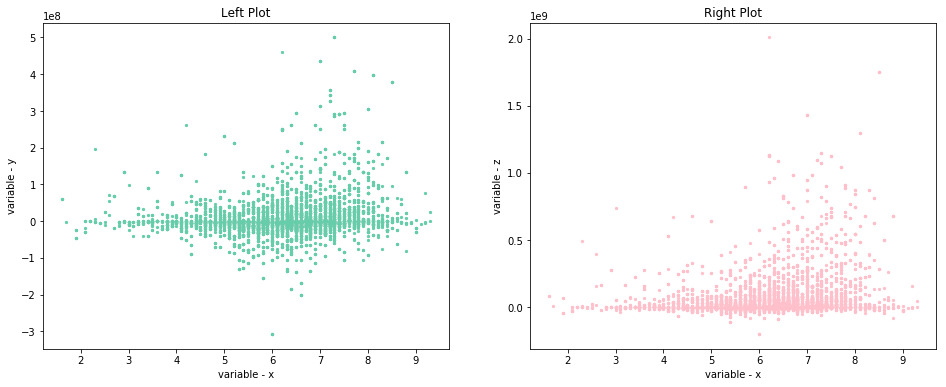

In [355]:
# First create figure
fig = plt.figure(figsize=(16,6))

# set axes (determine which subplot will be displayed where on the figure matrix)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# create subplots
ax1.scatter(df_imbd_budgets["averagerating"], df_imbd_budgets["ROI_domestic"], color="mediumaquamarine", s=5)
ax2.scatter(df_imbd_budgets["averagerating"], df_imbd_budgets["ROI_international"], color="pink", s=5)

# Add descriptors
ax1.set_xlabel("Domestic ROI")
ax1.set_ylabel("variable - y")
ax1.set_title("Domestic ROI vs Average Ratings")

ax2.set_xlabel("variable - x")
ax2.set_ylabel("variable - z")
ax2.set_title("Right Plot")
print('Full Title');
# prevents extraneous (excess, and in this case unsightly) info

